In [38]:
# imports 

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from sklearn.metrics import confusion_matrix
from numpy import linalg as la 
import scipy

# validate that imports and dependencies are setup correctly 
print("Imports successful ...")

Imports successful ...


In [3]:
# load the mnst characer dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


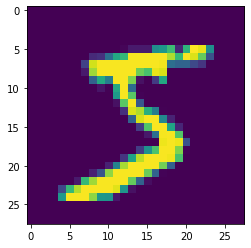

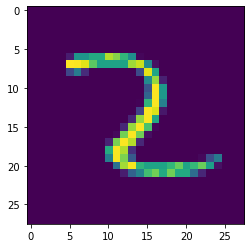

In [4]:
# create a plotting object and show examples
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(x_train[0,:,:])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.imshow(x_test[2500, :, :])

In [5]:
y_test[2500] 

2

In [6]:
784/16

49.0

In [7]:
# construct a machine learning model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(784, activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [ ]:
#compile model
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=1)

In [8]:
test_predictions = model.predict(x_test)

In [9]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))

In [10]:
confusion

array([[  8,  11,  34, 154,  24,  40, 473,  51, 171,  14],
       [ 21, 574, 171,   7,  67,   8,  22,  35, 215,  15],
       [109, 162, 114, 179,  84,  67,  33,  79, 155,  50],
       [ 20,  98, 139, 141, 107,  23, 182,  87, 171,  42],
       [ 15,  37,  52, 154,  81,  16,  74, 172, 259, 122],
       [ 11,  21,  75,  90, 112,  42, 221,  55, 174,  91],
       [106,  75, 149,  98, 103,  30,  69,  41, 211,  76],
       [  2,  48, 103, 138, 161,  10,  71, 117, 305,  73],
       [ 32,  54, 120, 142, 124,  16,  68,  31, 227, 160],
       [  9,  23,  44, 237, 143,  11,  76,  70, 252, 144]], dtype=int64)

In [11]:
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 27.3178 - accuracy: 0.1111
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 27.3151 - accuracy: 0.1028
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 27.3139 - accuracy: 0.1028
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 27.3132 - accuracy: 0.1020
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 27.3126 - accuracy: 0.1010
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 27.3120 - accuracy: 0.1015
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 27.3116 - accuracy: 0.1018
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 27.3112 - accuracy: 0.1002
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 27.3108 - accuracy: 0.1023
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - lo

In [12]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[114,  80,  99,  99,  87, 127,  87,  99,  90,  98],
       [105, 112, 113, 125, 115, 136,  99, 108, 116, 106],
       [101, 102, 125,  90, 120, 112, 110,  98,  81,  93],
       [ 88, 129,  96, 100, 123, 119,  90, 105,  76,  84],
       [ 98, 114, 100, 115, 117,  79,  91, 102,  75,  91],
       [ 59,  90,  86, 101,  97,  93,  93,  92,  81, 100],
       [107, 102, 103,  91, 100,  95, 114, 110,  68,  68],
       [ 94, 102, 133,  99, 113, 119,  90, 106,  78,  94],
       [106,  95, 120,  96, 121,  91,  90, 111,  66,  78],
       [111,  84,  88, 102, 122, 104,  77, 115,  82, 124]], dtype=int64)

In [13]:
# use a different loss function than mean squared error
model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.5032 - accuracy: 0.8472


In [15]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[ 958,    0,    0,    2,    0,    1,   10,    4,    5,    0],
       [   0, 1110,    3,    2,    1,    0,    3,    2,   14,    0],
       [  13,    3,  908,   21,   16,    0,    7,   22,   40,    2],
       [   6,    1,   18,  932,    1,   12,    3,   17,   14,    6],
       [   2,    2,    6,    0,  893,    1,    9,    4,   12,   53],
       [  18,    3,    4,   63,    7,  723,   21,   13,   33,    7],
       [  18,    3,    8,    3,   19,    9,  893,    3,    2,    0],
       [   0,   11,   17,    6,    7,    0,    1,  954,    8,   24],
       [  11,    6,    7,   50,    9,    9,   11,   17,  846,    8],
       [   9,    5,    1,   14,   35,    5,    3,   55,   12,  870]],
      dtype=int64)

## Homework Question 2

In [16]:
x = np.random.randint(-5, 5, (10, 2))
x

array([[-2,  1],
       [-5, -5],
       [-2, -5],
       [ 4,  0],
       [-3, -2],
       [-2, -4],
       [-4, -1],
       [-2, -4],
       [-2,  2],
       [ 2, -1]])

In [17]:
c1 = x[0,:]
c2 = x[1,:]
c3 = x[2,:]

dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x 

In [18]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis=1)
k3 = la.norm(dist3, axis=1)

In [19]:
clusters = np.argmin([k1, k2, k3], axis=0)

clusters

array([0, 1, 2, 0, 0, 2, 0, 2, 0, 0], dtype=int64)

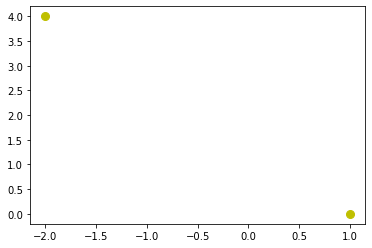

In [20]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]
centroids = np.hstack([C1.T,C2.T,C3.T])
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize = 8, label='Centroids')

## Homework Question 3

In [31]:
x11 = np.random.standard_normal((200, 1)) * 1.2 + np.ones((200,1))-2
x12 = np.random.standard_normal((200,1))*0.8 + np.ones((200,1))-2
x1 = np.concatenate((x11, x12), axis=1)

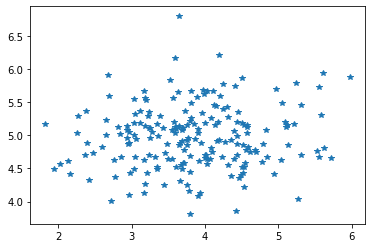

In [32]:
plt.plot(x[:, 0], x[:, 1], '*')

In [33]:
x21 = np.random.standard_normal((200, 1)) * 0.9 + np.ones((200,1))
x22 = np.random.standard_normal((200,1))*0.7 + np.ones((200,1))
x2 = np.concatenate((x21, x22), axis=1)


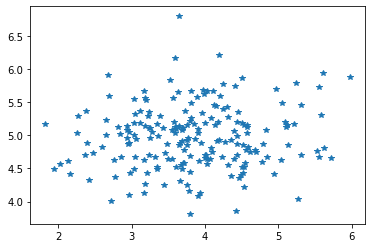

In [34]:
plt.plot(x[:, 0], x[:, 1], '*')

In [35]:
x31 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))+3
x32 = np.random.standard_normal((200,1))*0.5+np.ones((200,1))+4
x3 = np.concatenate((x31,x32), axis=1)

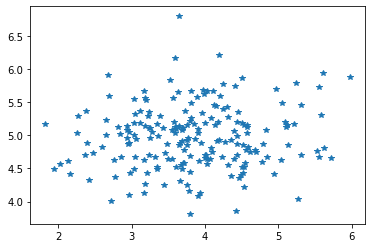

In [36]:
plt.plot(x[:, 0], x[:, 1], '*')

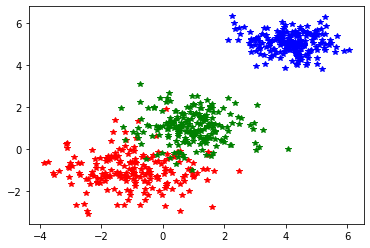

In [37]:
X = np.concatenate((x1, x2, x3), axis=0)
plt.plot(X[0:200,0], X[0:200, 1], 'r*')
plt.plot(X[200:400,0], X[200:400,1], 'g*')
plt.plot(X[400:600,0], X[400:600, 1], 'b*')

In [40]:
from scipy.spatial.distance import euclidean as dist
x = X
k = 4
no_of_iterations = 5
idx = np.sort(np.random.choice(len(x)), k, replace=False)


TypeError: _sort_dispatcher() got an unexpected keyword argument 'replace'